# 1. Business Problem
## 1.1 Problem Context

Our client is a large Real Estate Investment Trust (REIT).
* They invest in houses, apartments, and condos(complex of buildings) within a small county in New York state.
* As part of their business, they try to predict the fair transaction price of a property before it's sold.
* They do so to calibrate their internal pricing models and keep a pulse on the market.

## 1.2 Problem Statement
The REIT has hired us to find a data-driven approach to valuing properties.
* They currently have an untapped dataset of transaction prices for previous properties on the market.
* The data was collected in 2016.
* Our task is to build a real-estate pricing model using that dataset.
* If we can build a model to predict transaction prices with an average error of under US Dollars 70,000, then our client will be very satisfied with the our resultant model.

## 1.3 Business Objectives and Constraints
* Deliverable: Trained model file
* Win condition: Avg. prediction error < \$70,000
* Model Interpretability will be useful
* No latency requirement

# 2. Machine Learning Problem
## 2.1 Data Overview

For this project:
1. The dataset has 1883 observations in the county where the REIT operates.
2. Each observation is for the transaction of one property only.
3. Each transaction was between \$200,000 and \$800,000.

#### Target Variable
* 'tx_price' - Transaction price in USD

#### Features of the data:

Public records:
* 'tx_year' - Year the transaction took place
* 'property_tax' - Monthly property tax
* 'insurance' - Cost of monthly homeowner's insurance

Property characteristics:
* 'beds' - Number of bedrooms
* 'baths' - Number of bathrooms
* 'sqft' - Total floor area in squared feet
* 'lot_size' - Total outside area in squared feet
* 'year_built' - Year property was built
* 'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile
* 'basement' - Does the property have a basement?
* 'exterior_walls' - The material used for constructing walls of the house
* 'roof' - The material used for constructing the roof

Location convenience scores:
* 'restaurants' - Number of restaurants within 1 mile
* 'groceries' - Number of grocery stores within 1 mile
* 'nightlife' - Number of nightlife venues within 1 mile
* 'cafes' - Number of cafes within 1 mile
* 'shopping' - Number of stores within 1 mile
* 'arts_entertainment' - Number of arts and entertainment venues within 1 mile
* 'beauty_spas' - Number of beauty and spa locations within 1 mile
* 'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile

Neighborhood demographics:
* 'median_age' - Median age of the neighborhood
* 'married' - Percent of neighborhood who are married
* 'college_grad' - Percent of neighborhood who graduated college

Schools:
* 'num_schools' - Number of public schools within district
* 'median_school' - Median score of the public schools within district, on the range 1 - 10



# Exploratory data analysis

#### Import the libraries

In [ ]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")



Load real estate data from CSV

In [ ]:
df = pd.read_csv('real_estate_data.csv')

Display the dimensions of the dataset.

In [ ]:
df.shape

(1883, 26)

Columns of the dataset

In [ ]:
df.columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement', 'restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'],
      dtype='object')

Display the first 5 rows to see example observations.

In [ ]:
pd.set_option('display.max_columns', 20) ## display max 20 columns
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,...,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


Some feaures are numeric and some are categorical<br>
Filtering the categorical features:

In [ ]:
df.dtypes[df.dtypes=='object']

property_type     object
exterior_walls    object
roof              object
dtype: object

## Distributions of numeric features
One of the most enlightening data exploration tasks is plotting the distributions of your features.

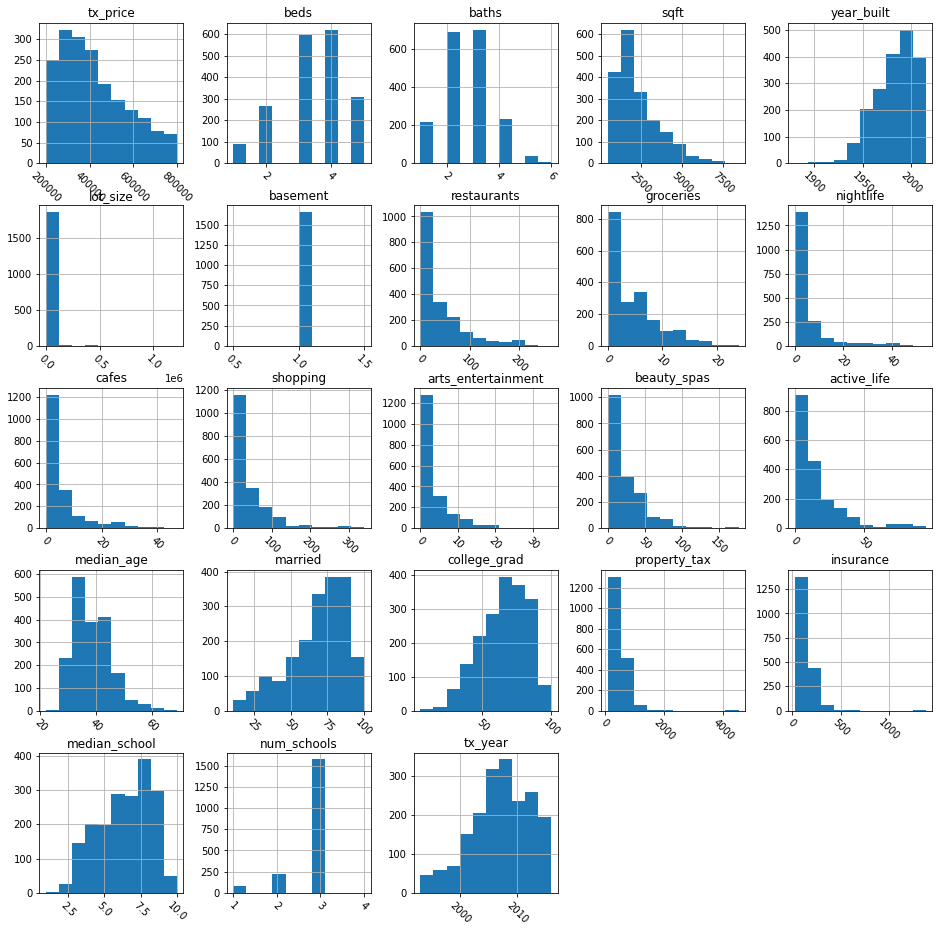

In [ ]:
# Plot histogram grid
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

**Observations:**
We can make out quite a few observations:

For example, consider the histogram for num_schools:
* More than 1500 houses have 3 schools with a mile

Consider the histogram for sqft:
* More than 400 houses have area within 2000 sqft
* Very few houses have area more than 5000 sqft

Consider the histogram for beds:
* Over 600 houses have 4 bedrooms, and similar number of houses have 3 bedrooms.
* Less than 100 houses have one bedroom and so on.

Also, look at the plot for the 'year_built' feature:
* The last bin in the histogram represents the range 2010-2020.
* Since this dataset was pulled in 2016, we should not have properties built in 2019.
* A property built after 2016 would be a measurement error.
* However, because of the 10-year bins, it's hard to tell if there's a measurement error just from the plot above.

Display summary statistics for the numerical features.

In [ ]:
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,...,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,...,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,...,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,...,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,...,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,...,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


**Obeservation:**
* Look at the 'year_built' column, we can see that its max value is 2015.
* The 'basement' feature has some missing values, also its standard deviation is 0.0, while its min and max are both 1.0. Maybe this is a feature that should be binary consisting values 0 and 1.

## Distributions of categorical features
Display summary statistics for categorical features.

In [ ]:
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


**Observation:**
* 'exterior_walls' and 'roof' have missing values
* There are 16 unique classes for 'exterior_walls' and 'roof'
* The most frequent element for exterior_walls is 'Brick'and it has come 687 times.

### Bar plots for categorical Features

Plot bar plot for the 'exterior_walls' feature.

<AxesSubplot:xlabel='count', ylabel='exterior_walls'>

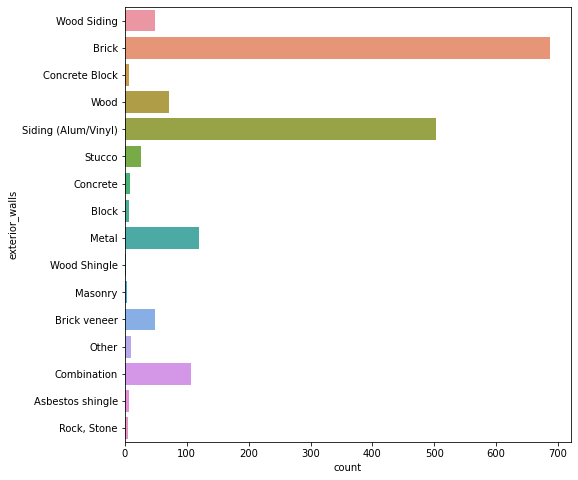

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='exterior_walls', data=df)

**Observations:**
Take a look at the frequencies of the classes.

Several classes are quite prevalent in the dataset. They have long bars. Those include:
* 'Brick' shows count of 687 as we get in features and is most frequent
* 'Siding (Alum/Vinyl)'
* 'Metal'
* 'Combination'

Some classes have really short bars. For example:
* 'Concrete Block'
* 'Concrete'
* 'Block'
* 'Wood Shingle'
* others
* These don't have many observations, and they are called sparse classes.

Similarly Plot bar plot for the 'roof' feature.

<AxesSubplot:xlabel='count', ylabel='roof'>

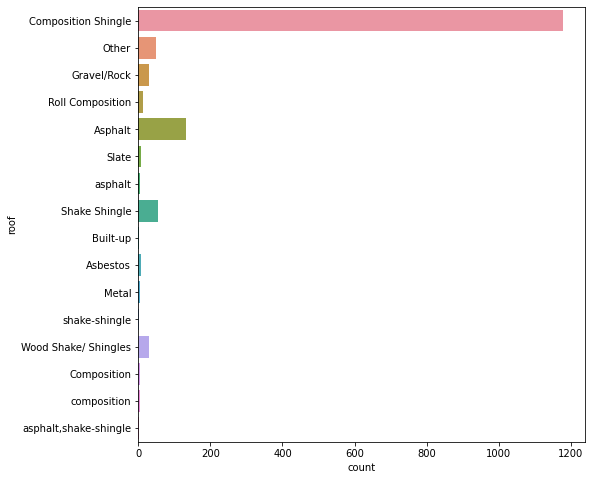

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y='roof', data=df)

**Observations:**

* The class which has a lasrgest count is Composition Shingle

Following are the sparse classes having very small bars/observations:
* 'Metal'
* 'shake-shingle'
* 'composition'

<AxesSubplot:xlabel='count', ylabel='property_type'>

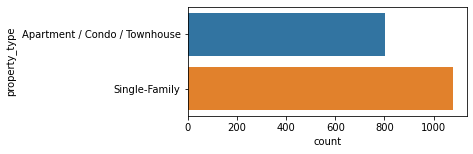

In [ ]:
plt.figure(figsize=(5,2))
sns.countplot(y='property_type', data=df)

** Observation **:
* Property_type having single family has maximum count greater than 1000
* There is no sparse class in property_type

From the above bar plots:

**Observations:** In both 'exterior_walls' and 'roof' as well we have many sparse classes

##  Segmentations
Segmentations are powerful ways to cut the data to observe the relationship between categorical features and numeric features.

Segmenting the target variable by key categorical features.

<AxesSubplot:xlabel='tx_price', ylabel='property_type'>

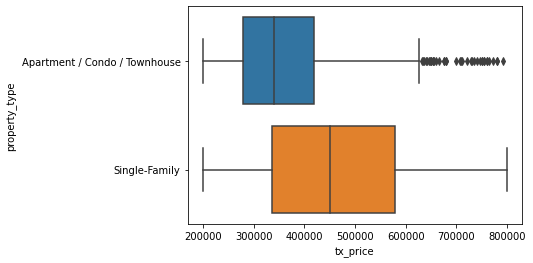

In [ ]:
sns.boxplot(y='property_type', x='tx_price', data=df)

**Observation:** In general, it looks like single family homes are more expensive.

Let's compare the two property types across other features as well

In [ ]:
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,...,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,...,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


** Observations **:
* Property having single-family is larger in sqft area.It also has more bedrooms than other property-type.
* Apartment/townhouse has larger lots than the property having single-family.
* Apartmenr/condo/Townhouse type of property is in areas with more restaurants,nightlife options,more grocery stores,shopping stores,active_life(gym,sports,yoga studios)
* Property_type such as apartments,Condo,Townhouse is more crowded and so have more fascilities but smaller in sqft area so have lesser price whereas property-type having single-family are generally large in size and has lesser fascilities as less crowded. 

Segment 'sqft' by 'property_type' and plot the boxplots.

<AxesSubplot:xlabel='sqft', ylabel='property_type'>

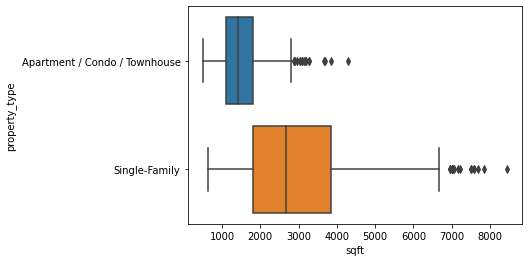

In [ ]:
sns.boxplot(y='property_type', x='sqft', data=df)

After producing the plot, consider these questions:
* property-type single family is larger, on average.
* Property-type single family has greater variance in sizes.
* Sqft area of Apartment type property lies between 1000 to 2000 and have no much variation.It always has area lesser than single-family houses

Segment by property_type and display the means and standard deviations within each class

## Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [ ]:
df.corr()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,...,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,...,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,...,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,...,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,...,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,...,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,...,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,...,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,...,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


#### A lot of numbers make things difficult to read. So let's visualize this.
But first, it's important to notice that the correlations for 'basement' all show as NaN. This is expected because right now that feature doesn't vary at all (its standard deviation is 0), as we saw all the way back in step 2. We'll fix this later.

<AxesSubplot:>

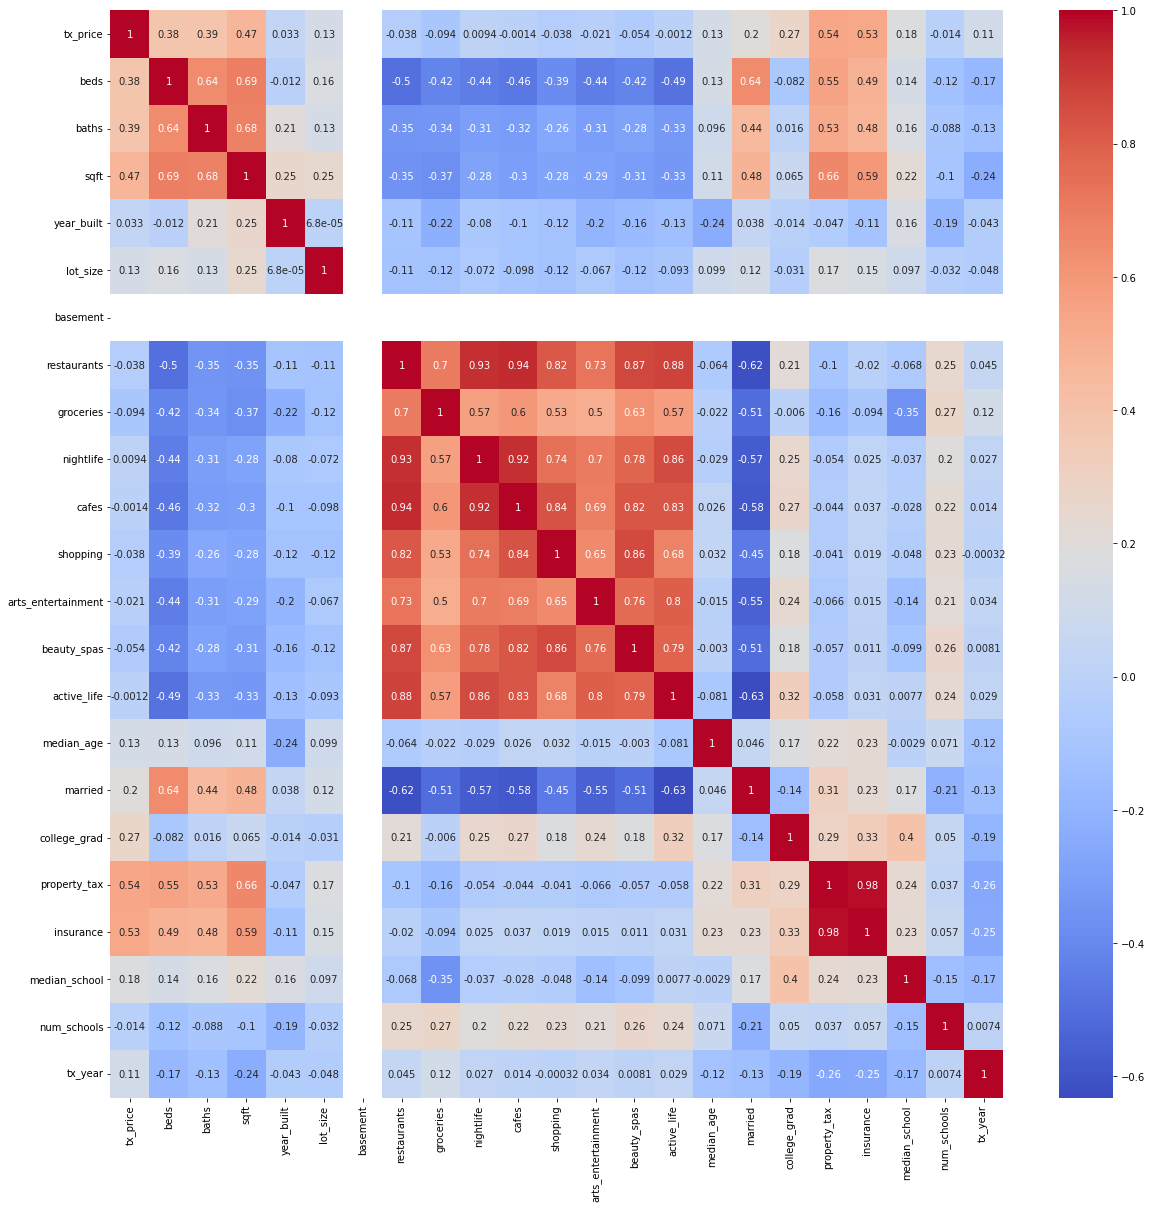

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

**What to look for?**
* The colorbar on the right explains the meaning of the heatmap - Dark colors indicate **strong negative correlations** and light colors indicate **strong positive correlations**.
* Perhaps the most helpful way to interpret this correlation heatmap is to first find features that are correlated with our target variable by scanning the first column.
* In this case, it doesn't look like many features are strongly correlated with the target variable.

* Example: there is a strong negative correlation between beds and restaurants, or gloceries and median_schools.
* There is a weak positive correlation between 'tx_price' and 'property_tax'.

# Data Cleaning

##  Dropping the duplicates (De-duplication)


In [ ]:
df = df.drop_duplicates()
print( df.shape )

(1883, 26)


It looks like we didn't have any duplicates in our original dataset. Even so, it's a good idea to check this as an easy first step for cleaning your dataset.

In [ ]:
df.isna().sum()

tx_price                0
beds                    0
baths                   0
sqft                    0
year_built              0
lot_size                0
property_type           0
exterior_walls        223
roof                  354
basement              226
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
tx_year                 0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='roof'>

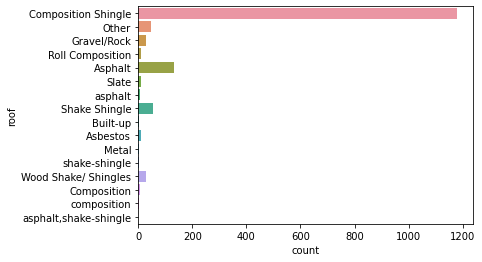

In [ ]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)

Using this plot, we can easily catch typos and inconsistent capitalization. For example:
* 'composition' should be 'Composition'
* 'asphalt' should be 'Asphalt'
* 'shake-shingle' should be 'Shake Shingle'
* 'asphalt,shake-shingle' could probably just be 'Shake Shingle'

In [ ]:
df.roof.replace('composition', 'Composition', inplace=True)
df.roof.replace('asphalt', 'Asphalt', inplace=True)
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

<AxesSubplot:xlabel='count', ylabel='roof'>

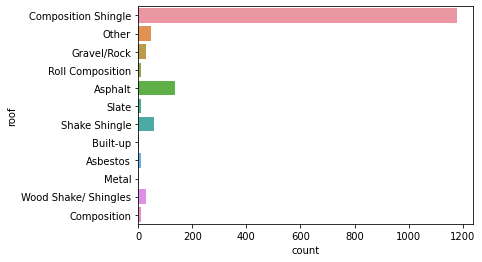

In [ ]:
# Class distribution for 'roof' after the modifications
sns.countplot(y='roof', data=df)

##  Mislabeled classes
Finally, we'll check for classes that are labeled as separate classes when they should really be the same.
* e.g. If 'N/A' and 'Not Applicable' appear as two separate classes, we should combine them.
* let's plot the class distributions for 'exterior_walls':

<AxesSubplot:xlabel='count', ylabel='exterior_walls'>

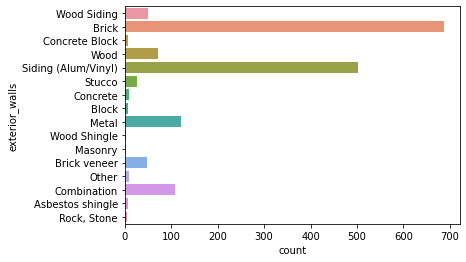

In [ ]:
sns.countplot(y='exterior_walls', data=df)

Using that chart, we can easily catch mislabeled classes. For example
* 'Rock, Stone' should be 'Masonry'
* 'Concrete' and 'Block' should both just be 'Concrete Block'

<AxesSubplot:xlabel='count', ylabel='exterior_walls'>

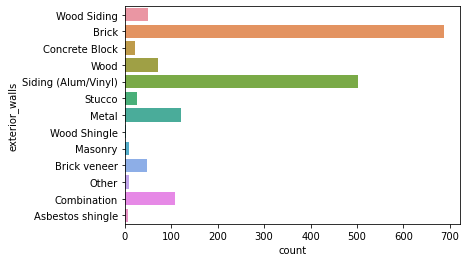

In [ ]:
df.exterior_walls.replace(['Rock, Stone'], 'Masonry', inplace=True)
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)
sns.countplot(y='exterior_walls', data=df)

## Removing Outliers
* Outliers can cause problems with certain types of models.
* Boxplots are a nice way to detect outliers
* Let's start with a box plot of your target variable, since that's what you're actually trying to predict.

<AxesSubplot:xlabel='tx_price'>

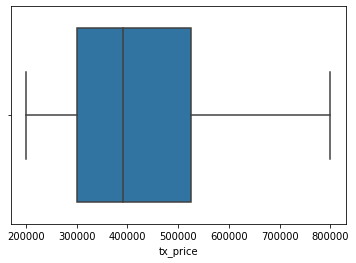

In [ ]:
sns.boxplot(df.tx_price)

**Interpretation**

* The two vertical bars on the ends are the min and max values. All properties sold for between \$200,000 and \$800,000.
* The box in the middle is the interquartile range (25th percentile to 75th percentile).
* Half of all observations fall in that box.
* Finally, the vertical bar in the middle of the box is the median.

<AxesSubplot:xlabel='beds'>

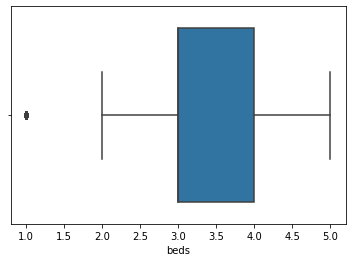

In [ ]:
## Checking outliers in number of bedrooms
sns.boxplot(df.beds)

<AxesSubplot:xlabel='sqft'>

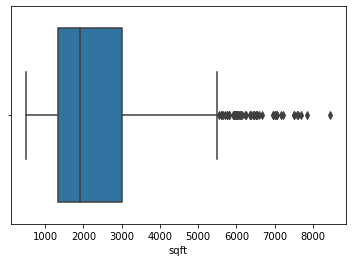

In [ ]:
## Checking outliers in size of the house
sns.boxplot(df.sqft)

<AxesSubplot:xlabel='lot_size'>

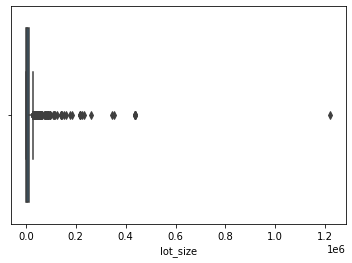

In [ ]:
## Checking outliers in lot size
sns.boxplot(df.lot_size)

Look at the dot on the extreme right. This might indicate some erroneous point.

Let's look at the largest 5 lot sizes just to confirm.

In [ ]:
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1832     436035
1876     436035
1839     435600
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft.

Because it's unlikely the REIT will ever invest in properties with lots that large, and because it's the only one in the dataset, let's remove it so it doesn't interfere with our ability to model normal size properties.

In [ ]:
## Remove observations with lot_size greater than 500,000 sqft.
df = df[df.lot_size <= 500000]
df.shape

(1882, 26)

<AxesSubplot:xlabel='lot_size'>

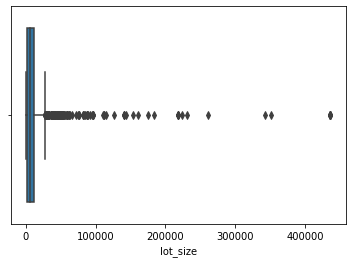

In [ ]:
## Plotting the boxplot of lot size after the change
sns.boxplot(df.lot_size)

**Note:** Even though visually the plot looks the same but the x-axis dimensions have changed

In [ ]:
df.columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement', 'restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'],
      dtype='object')

In [ ]:
df1=df.drop('property_type',axis=1)
df1=df1.drop('roof',axis=1)
df1=df1.drop('exterior_walls',axis=1)

In [ ]:
for k, v in df1.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df1)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column tx_price outliers = 0.00%
Column beds outliers = 4.78%
Column baths outliers = 2.44%
Column sqft outliers = 2.98%
Column year_built outliers = 0.85%
Column lot_size outliers = 7.60%
Column basement outliers = 88.04%
Column restaurants outliers = 6.16%
Column groceries outliers = 2.66%
Column nightlife outliers = 9.72%
Column cafes outliers = 10.89%
Column shopping outliers = 7.01%
Column arts_entertainment outliers = 4.52%
Column beauty_spas outliers = 3.35%
Column active_life outliers = 5.79%
Column median_age outliers = 1.12%
Column married outliers = 1.59%
Column college_grad outliers = 0.27%
Column property_tax outliers = 3.56%
Column insurance outliers = 4.04%
Column median_school outliers = 0.00%
Column num_schools outliers = 100.00%
Column tx_year outliers = 0.58%


In [ ]:
for col in df1.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df[col] = df[col].mask(df[col] < lower_bound, df[col].median(), axis=0)
    df[col] = df[col].mask(df[col] > upper_bound, df[col].median(), axis=0)

#missing *vlaues*

In [ ]:
df.isna().sum()

tx_price                0
beds                    0
baths                   0
sqft                    0
year_built              0
lot_size                0
property_type           0
exterior_walls        223
roof                  353
basement              225
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
tx_year                 0
dtype: int64

In [ ]:
# Display number of missing values by categorical feature
df.select_dtypes(include=['object']).isna().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

#### The best way to handle missing data for categorical features is to simply label them as 'Missing'

In [ ]:
mode1=df['exterior_walls'].mode()[0]
df['exterior_walls']=df['exterior_walls'].fillna(mode1)
mode2=df['roof'].mode()[0]
df['roof']=df['roof'].fillna(mode2)


In [ ]:
df.select_dtypes(include=['object']).isna().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

Well, it looks like we don't have any numerical features with missing values in this dataset.

#  Feature Engineering

##  Indicator variables

People might also not take much interest in old properties.Lets figure it out.

In [ ]:
df['old_properties'] = (df.year_built < 1980) .astype(int)

Create a new feature containing tax and insurance which a propery holder will have to pay monthly

In [ ]:
df['tax_and_insurance'] = df.property_tax + df.insurance

### Example: housing market recession
According to data from Zillow, the lowest housing prices were from 2010 to end of 2013 (country-wide).


In [ ]:
df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)

## Interaction features


In [ ]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built

**Note:** 'property_age' denotes the age of the property when it was sold and not how old it is today, since we want to predict the price at the time when the property is sold.

Sanity Check: It's always nice to do a quick sanity check after creating a feature, which could save you headaches down the road. For example, 'property_age' should never be less than 0, right?

In [ ]:
print(df.property_age.min())

-8.0


Nice find. Something is definitely wrong. Age of property can never be negative.

In [ ]:
# Number of observations with 'property_age' < 0
print(sum(df.property_age < 0))

19


* On second thought, it's possible that some home owners bought houses before the construction company built them.
* This is not uncommon, especially with single-family homes.
* However, for this problem, **we are only interested in houses that already exist** because the REIT only buys existing ones!

In [ ]:
# Remove rows where property_age is less than 0
df = df[df.property_age >= 0]
df.shape

(1863, 31)

Now, let's add another interaction feature. How about the number of quality schools nearby?
* We know the number of schools nearby 
* We also have their median quality score
* Let's use this and create a new feature

In [ ]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df.num_schools * df.median_school

In [ ]:
# Display median school score
df.school_score.median()

21.0

*  As we can see almost all properties have basement, this feature won't affect the price of the property much, so we can remove it 

<AxesSubplot:xlabel='count', ylabel='basement'>

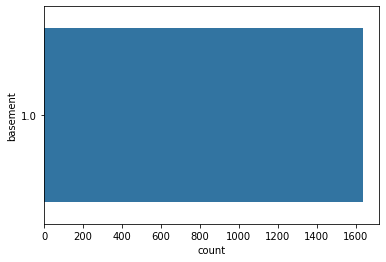

In [ ]:
sns.countplot(y='basement', data=df)

In [ ]:
#dropping the basement column
df = df.drop(['basement'], axis=1) 

* We can also delete some features which are less useful
* If we looked at the histogram of nightlife, almost all properties have nightlife within a mile also it has a poor relation with price of property(refer correlation part) so this feature might not be much useful do let's drop it.

In [ ]:
df = df.drop(['nightlife'], axis=1) 

<AxesSubplot:xlabel='count', ylabel='exterior_walls'>

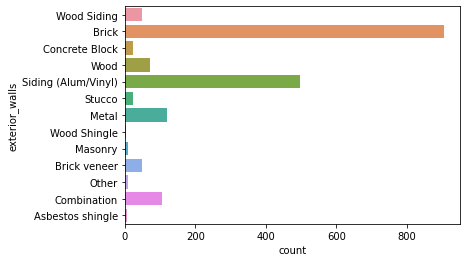

In [ ]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)

Group 'Wood Siding', 'Wood Shingle', and 'Wood' together. Label all of them as 'Wood'.

In [ ]:
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle', 'Wood'], 'Wood', inplace=True)

Next, we can group the remaining sparse classes into a single 'Other' class, even though there's already an 'Other' class.<br>
Let's label 'Stucco', 'Other', 'Asbestos shingle', 'Concrete Block', and 'Masonry' as 'Other':

In [ ]:
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

Finally, now that we've grouped together sparse classes, let's look at the bar plot for exterior walls again.

<AxesSubplot:xlabel='count', ylabel='exterior_walls'>

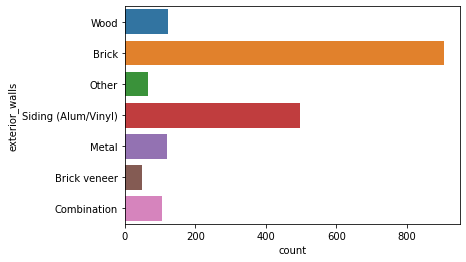

In [ ]:
sns.countplot(y='exterior_walls', data=df)

Similarly we check for 'roof'

<AxesSubplot:xlabel='count', ylabel='roof'>

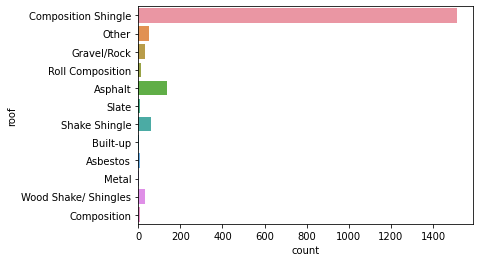

In [ ]:
sns.countplot(y='roof', data=df)

Group 'Composition' and 'Wood Shake/ Shingles' into the 'Composition Shingle' class.

In [ ]:
df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

Next, let's group remaining sparse classes into a single 'Other' class.

Label 'Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', and 'Metal' as 'Other'.

In [ ]:
other_roof = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']
df.roof.replace(other_roof, 'Other', inplace=True)

Finally, display bar plot again.

<AxesSubplot:xlabel='count', ylabel='roof'>

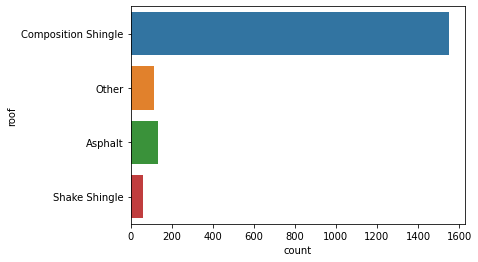

In [ ]:
sns.countplot(y='roof', data=df)

**Now these plots look much nicer**

## Encode dummy variables (One Hot Encoding)
* Machine learning algorithms cannot directly handle categorical features. Specifically, they cannot handle text values.
* Therefore, we need to create dummy variables for our categorical features.
* *Dummy variables* are a set of binary (0 or 1) features that each represent a single class from a categorical feature.

In [ ]:
# Create a new dataframe with dummy variables for for our categorical features.
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'],drop_first=True)

**Note:** There are many ways to perform one-hot encoding, you can also use LabelEncoder and OneHotEncoder classes in SKLEARN or use the above pandas function.

In [ ]:
df.columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'restaurants', 'groceries', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year',
       'two_and_two', 'old_properties', 'tax_and_insurance',
       'during_recession', 'property_age', 'school_score',
       'exterior_walls_Brick veneer', 'exterior_walls_Combination',
       'exterior_walls_Metal', 'exterior_walls_Other',
       'exterior_walls_Siding (Alum/Vinyl)', 'exterior_walls_Wood',
       'roof_Composition Shingle', 'roof_Other', 'roof_Shake Shingle',
       'property_type_Single-Family'],
      dtype='object')

In [ ]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,restaurants,groceries,cafes,shopping,...,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Composition Shingle,roof_Other,roof_Shake Shingle,property_type_Single-Family
0,295850,3.0,1.0,584.0,2013.0,0.0,107.0,9.0,3.0,89.0,...,0,0,0,0,0,1,1,0,0,0
1,216500,3.0,1.0,612.0,1965.0,0.0,105.0,15.0,13.0,87.0,...,0,0,0,0,0,0,1,0,0,0
2,279900,3.0,1.0,615.0,1963.0,0.0,23.0,13.0,3.0,101.0,...,0,0,0,0,0,1,1,0,0,0
3,379900,3.0,1.0,618.0,2000.0,6074.0,23.0,9.0,3.0,22.0,...,0,0,0,0,0,1,1,0,0,0
4,340000,3.0,1.0,634.0,1992.0,0.0,23.0,7.0,3.0,83.0,...,0,0,0,0,0,0,1,0,0,0


##  Remove unused or redundant features
* Redundant features would typically be those that have been **replaced by other features** that you've added.
* For example, since we used 'tx_year' and 'year_built' to create the 'property_age' feature, we might consider removing them.


In [ ]:
# Drop 'tx_year' and 'year_built' from the dataset
df = df.drop(['tx_year', 'year_built'], axis=1)  ## axis=1 because we are dropping columns.

* Also remove 'property_tax' and 'insurance' as we have combined them in 'tax_and _insurance'

In [ ]:
df = df.drop(['property_tax', 'insurance'], axis=1)  ## axis=1 because we are dropping columns.

Finally, before we move on to the next module, let's save our new DataFrame we that augmented through feature engineering. We'll call it the analytical base table because we'll be building our models on it.
* Remember to set the argument index=None to save only the data.

In [ ]:
df.columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'lot_size', 'restaurants',
       'groceries', 'cafes', 'shopping', 'arts_entertainment', 'beauty_spas',
       'active_life', 'median_age', 'married', 'college_grad', 'median_school',
       'num_schools', 'two_and_two', 'old_properties', 'tax_and_insurance',
       'during_recession', 'property_age', 'school_score',
       'exterior_walls_Brick veneer', 'exterior_walls_Combination',
       'exterior_walls_Metal', 'exterior_walls_Other',
       'exterior_walls_Siding (Alum/Vinyl)', 'exterior_walls_Wood',
       'roof_Composition Shingle', 'roof_Other', 'roof_Shake Shingle',
       'property_type_Single-Family'],
      dtype='object')

# Machine Learning Models
## Data Preparation

###  Train and Test Splits
Separate your dataframe into separate objects for the target variable (y) and the input features (X) and perform the train and test split

In [ ]:
#writing  function  CHAIDDecisionTreeRegressor
class CHAIDDecisionTreeRegressor:
    
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth  #determines the maximum depth of the decision tree that will be constructed
        self.min_samples_split = min_samples_split #specifies the minimum number of samples required to split an internal node
        self.tree = {}
        
   
    def mse(self, y):
        # Calculate mean squared error of targets
        return np.mean((y - np.mean(y))**2)
    
    
   
    def split_data(self, feature, split, X, y):
        left_indices = np.where(X[:, feature] < split) # find the indices of samples where the feature is less than the split value,(np.where)
        right_indices = np.where(X[:, feature] >= split) # find the indices of samples where the feature is greater than or equal to the split value
        X_left = X[left_indices] #create a new array of input samples for the left node using the left indices
        y_left = y[left_indices] #create a new array of labels for the left node using the left indice
        X_right = X[right_indices] # create a new array of input samples for the right node using the right indices
        y_right = y[right_indices] # create a new array of labels for the right node using the right indices
        return X_left, y_left, X_right, y_right # return the new input and label arrays for the left and right nodes
   
   
    def chi_squared_test(self, x, y):
        # Perform chi-squared test to determine if a split is significant
        n_total = len(y) # calculate the total number of samples
        n_left = len(np.where(x < x.mean())[0]) # calculate the number of samples in the left node (where x is less than the mean of x)
        n_right = n_total - n_left # calculate the number of samples in the right node
        p_left = n_left / n_total # calculate the   samples in the left node
        p_right = n_right / n_total # calculate the  samples in the right node
        y_left_mean = np.mean(y[x < x.mean()]) # calculate the mean of the labels for the samples in the left node
        y_right_mean = np.mean(y[x >= x.mean()])  # calculate the mean of the labels for the samples in the right node
        y_total_mean = np.mean(y) # calculate the mean of the labels for all the samples
        chi_squared = (n_left * (y_left_mean - y_total_mean)**2 / (p_left * (1 - p_left)) +    # calculate the first part of the chi-squared test statistic
                       n_right * (y_right_mean - y_total_mean)**2 / (p_right * (1 - p_right)))  # calculate the second part of the chi-squared test statistic
        return chi_squared 
   
    def find_split(self, X, y):
        best_feature, best_split, best_chi2 = None, None, 0
        n_features = X.shape[1] #This line finds the number of features in the feature matrix X
        for feature in range(n_features): #sets up a loop that iterates over each feature in the input feature matrix X
            for split in np.unique(X[:, feature]): #sets up a nested loop that iterates over the unique values of the feature 
                chi2 = self.chi_squared_test(X[:, feature], y) #passing in the values of the feature and target variable for the current split
                if chi2 > best_chi2: 
                    best_feature, best_split, best_chi2 = feature, split, chi2 # chi-squared test statistic are stored in the best_feature, best_split, and best_chi2 variables.
        return best_feature, best_split
   
   
    def build_tree(self, X, y, depth):
        # Recursively build the decision tree
        n_samples, n_features = X.shape
        # Check for stopping criteria
        if depth == self.max_depth or n_samples < 2*self.min_samples_split:
            leaf_value = np.mean(y)
            return leaf_value
        best_feature, best_split = self.find_split(X, y) #index of the best feature to split on and the best threshold to use for that feature
        if best_feature is None:
            leaf_value = np.mean(y)
            return leaf_value
        #The method returns four NumPy arrays: X_left and y_left, which contain the subset of the dataset
        # where the feature value is less than or equal to the threshold, and X_right and y_right,
        # which contain the subset of the dataset where the feature value is greater than the threshold
        X_left, y_left, X_right, y_right = self.split_data(best_feature, best_split, X, y)
        #This line is creating a Python dictionary called decision_node that represents a decision node in the decision tree
        decision_node = {"feature": best_feature, "split": best_split, "left": None, "right": None}
        decision_node["left"] = self.build_tree(X_left, y_left, depth+1)# The value is the result of a recursive call to the build_tre
        decision_node["right"] = self.build_tree(X_right, y_right, depth+1)
        return decision_node
    
    
    def fit(self, X, y):
          # Build the decision tree
          self.tree = self.build_tree(X, y, depth=0)
    
    
    def predict_single(self, x):
        # Traverse the decision tree to make a prediction for a single instance
        node = self.tree
        while isinstance(node, dict):
            if x[node["feature"]] < node["split"]:
                node = node["left"]
            else:
                node = node["right"]
        return node
    
    def predict(self, X):
        # Make predictions for multiple instances
        return np.array([self.predict_single(x) for x in X])
    
    # writing  function for r2_score (R2 = 1 - (SSres / SStot)) 
    def r2(self,y_true, y_pred):
      # Calculate the mean of the true values
      y_true_mean = sum(y_true) / len(y_true)
      
      # Calculate the total sum of squares (TSS)
      tss = sum((y_true - y_true_mean) ** 2)
      
      # Calculate the residual sum of squares (RSS)
      rss = sum((y_true - y_pred) ** 2)
      
      # Calculate the R-squared value
      r2_score = 1 - (rss / tss)
      
      return r2_score


    # To calaulate the MSE 
    def score(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse1 = sum(squared_differences) / len(squared_differences)
      
      return mse1
    
    def set_params(self, **kwargs):#**kwargs allows us to pass a variable number of keyword arguments
        for key, value in kwargs.items():
            setattr(self, key, value)
        return self
    


    

In [ ]:
def r2(y_true, y_pred):
      # Calculate the mean of the true values
      y_true_mean = sum(y_true) / len(y_true)
      
      # Calculate the total sum of squares (TSS)
      tss = sum((y_true - y_true_mean) ** 2)
      
      # Calculate the residual sum of squares (RSS)
      rss = sum((y_true - y_pred) ** 2)
      
      # Calculate the R-squared value
      r2_score = 1 - (rss / tss)
      
      return r2_score

In [ ]:
def mean_squared_error1(y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse1 = sum(squared_differences) / len(squared_differences)
      
      return mse1

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

In [ ]:
df.head()

,tx_price,beds,baths,sqft,lot_size,restaurants,groceries,cafes,shopping,arts_entertainment,...,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Composition Shingle,roof_Other,roof_Shake Shingle,property_type_Single-Family
0,295850,3.0,1.0,584.0,0.0,107.0,9.0,3.0,89.0,6.0,...,0,0,0,0,0,1,1,0,0,0
1,216500,3.0,1.0,612.0,0.0,105.0,15.0,13.0,87.0,2.0,...,0,0,0,0,0,0,1,0,0,0
2,279900,3.0,1.0,615.0,0.0,23.0,13.0,3.0,101.0,10.0,...,0,0,0,0,0,1,1,0,0,0
3,379900,3.0,1.0,618.0,6074.0,23.0,9.0,3.0,22.0,11.0,...,0,0,0,0,0,1,1,0,0,0
4,340000,3.0,1.0,634.0,0.0,23.0,7.0,3.0,83.0,10.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X=df.drop('tx_price',axis=1)
y=df['tx_price']

In [ ]:

# Split X and y into train and test sets: 80-20
xtrain,ytrain,xtest,ytest=train_test_split(X,y,test_size=0.2)

Let's confirm we have the right number of observations in each subset.